In [14]:
import pandas as pd
from fractions import Fraction
from empiricaldist import Pmf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [3]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

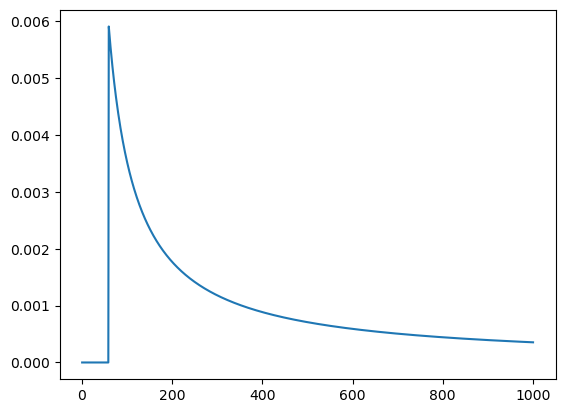

In [4]:
data = 60
posterior = prior.copy()
update_train(posterior, data)
posterior.plot();

In [5]:
np.sum(posterior.ps * posterior.qs)

333.41989326370776

## Power Law

In [6]:
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

7.485470860550345

In [7]:
data = 60
update_train(power, data)

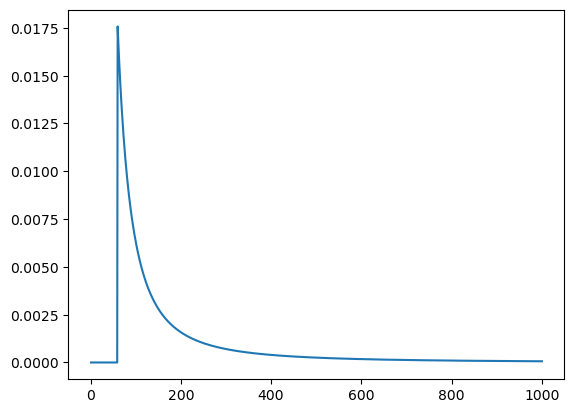

In [8]:
power.plot();

In [9]:
power.prob_le(134)

0.5928714951735516

In [10]:
def quantile(pmf, prob):
    """Compute a quantile with the given prob."""
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

In [11]:
quantile(power, 0.5)

112

In [12]:
power.quantile([0.025, 0.975])

array([ 61., 717.])

In [13]:
power.credible_interval(0.9)

array([ 62., 559.])

## Talk

In [41]:
pi = 1/365
n = 1200
k = 1

In [42]:
hypos = np.arange(1, 2000, 10)
prior = Pmf(1, hypos)

posterior = prior.copy()
pi_s = 1/hypos

In [43]:
posterior *= binom.pmf(2, hypos, pi)
posterior *= binom.pmf(1, hypos, pi)
posterior *= binom.pmf(0, hypos, pi)
posterior.normalize()

1.351759960090308

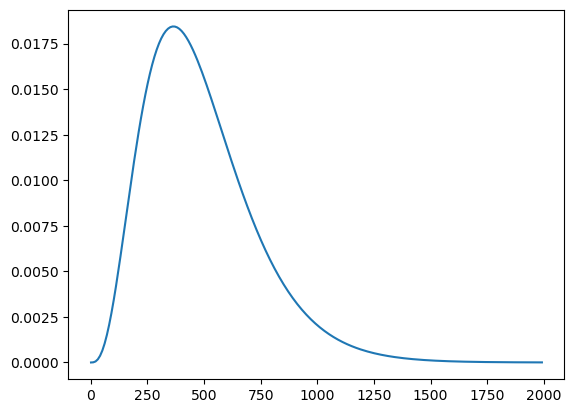

In [44]:
posterior.plot();

In [46]:
1- posterior.prob_le(1200), posterior.mean()

(0.011543092507705244, 486.22551616872903)

## Rabbits

In [50]:
hypos = np.arange(2, 11)
prior = Pmf(1, hypos)

posterior = prior * ((hypos-1)/hypos**2)
posterior.normalize()

1.3792005228017132

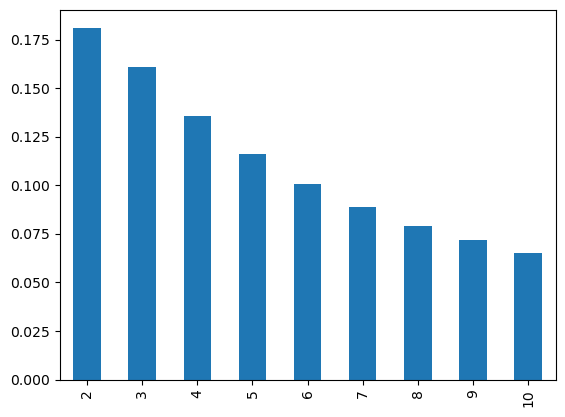

In [51]:
posterior.plot.bar();

## Prison

In [52]:
hypos = np.arange(1, 4)
prior = Pmf(1/3, hypos)
prior

,probs
1,0.333333
2,0.333333
3,0.333333


In [53]:
likelihood = hypos
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
1,0.166667
2,0.333333
3,0.500000


In [56]:
np.array([3, 2, 3, 1, 2, 3]).mean() / 2

1.1666666666666667

## Adult

Text(0.5, 1.0, 'Distribution of family size')

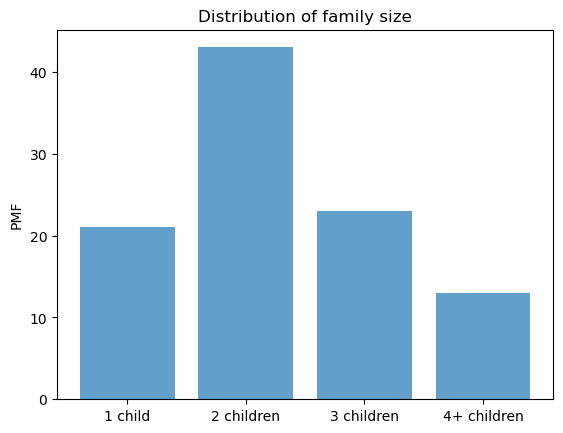

In [57]:
'''
If I chose a random adult in the U.S.,
what is the probability that they have a sibling?
To be precise, what is the probability that their mother
has had at least one other child.
'''

qs = [1, 2, 3, 4]
ps = [21, 43, 23, 13]
prior = Pmf(ps, qs)
prior.bar(alpha=0.7)

plt.xticks(qs, ['1 child', '2 children', '3 children', '4+ children'])
plt.ylabel('PMF')
plt.title('Distribution of family size')

In [58]:
prior = Pmf(np.array(ps) / 100, qs)
prior

,probs
1,0.21
2,0.43
3,0.23
4,0.13


In [61]:
posterior = prior * np.array(qs)
posterior.normalize()
posterior

,probs
1,0.092105
2,0.377193
3,0.302632
4,0.228070


In [62]:
posterior[1:].sum()

0.9078947368421053

## Doomsday

In [69]:
pi = 1/2
n = 108

hypos = [800, 2000]
prior = Pmf(1, hypos)

In [70]:
posterior = prior / np.array(hypos)
posterior.normalize()
posterior

,probs
800,0.714286
2000,0.285714
